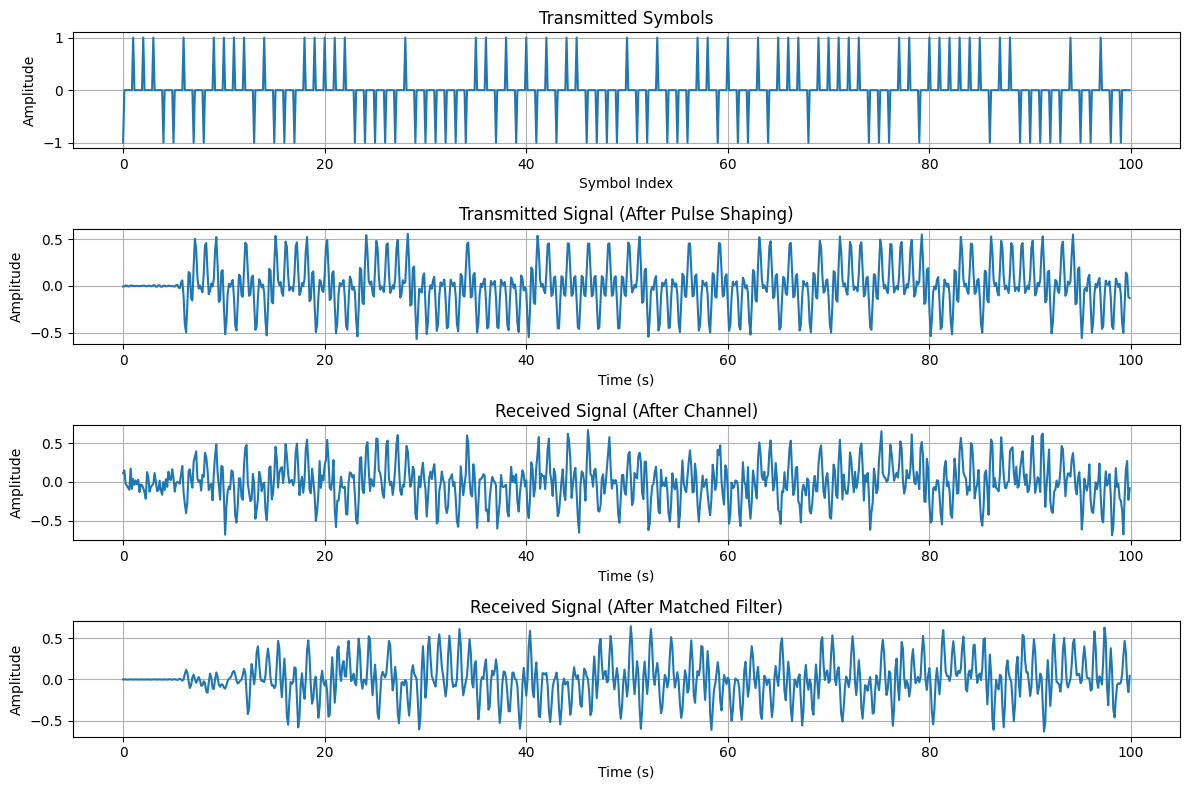

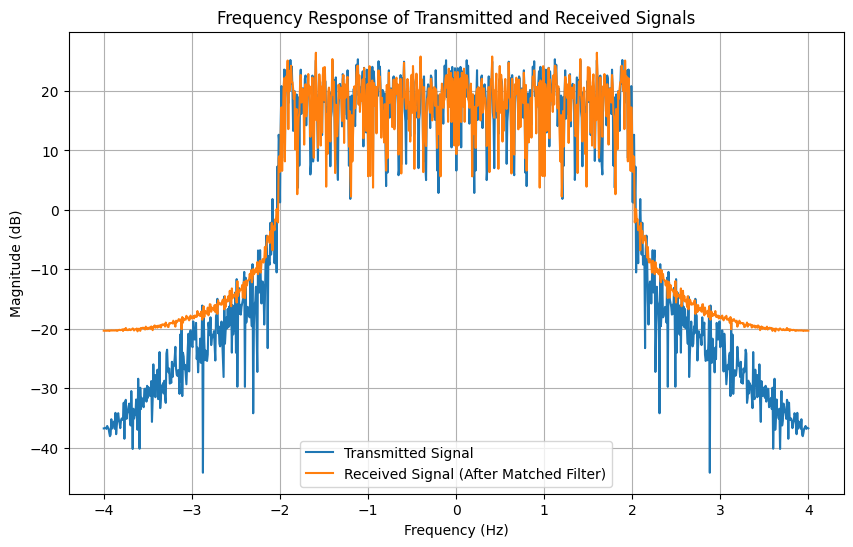

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
from scipy.fftpack import fft, fftshift

# Default parameters
samp_rate = 8.0  # Sample rate (oversampling factor)
symbol_rate = 1.0  # Symbol rate
alpha = 0.35  # Roll-off factor
num_taps = int(1e2)  # Number of taps
fft_size = 1024  # FFT size

# Generate the Root Raised Cosine Filter for pulse shaping and matched filtering
taps = firwin(num_taps, cutoff=symbol_rate / 2, window=("kaiser", alpha), scale=False)

# Generate a random BPSK signal (1 symbol per sample)
num_symbols = 100
symbols = 2 * np.random.randint(0, 2, num_symbols) - 1  # BPSK: -1 or 1

# Upsample the symbols (inserting zeros)
upsampled_symbols = np.zeros(int(num_symbols * samp_rate))
upsampled_symbols[:: int(samp_rate)] = symbols

# Apply the pulse shaping filter (Transmitter)
tx_signal = lfilter(taps, 1.0, upsampled_symbols)

# Simulate a simple channel (additive white Gaussian noise)
noise_power = 0.01
noise = np.sqrt(noise_power) * np.random.randn(len(tx_signal))
rx_signal = tx_signal + noise

# Apply the matched filter (Receiver)
rx_filtered = lfilter(taps, 1.0, rx_signal)

# Plot the transmitted and received signals
time_axis = np.arange(0, len(rx_signal)) / samp_rate

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(time_axis, upsampled_symbols)
plt.title("Transmitted Symbols")
plt.xlabel("Symbol Index")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(time_axis, tx_signal)
plt.title("Transmitted Signal (After Pulse Shaping)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(time_axis, rx_signal)
plt.title("Received Signal (After Channel)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(time_axis, rx_filtered)
plt.title("Received Signal (After Matched Filter)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

# FFT of the transmitted and received signals
tx_signal_fft = fftshift(fft(tx_signal, fft_size))
rx_signal_fft = fftshift(fft(rx_filtered, fft_size))
freq_axis = np.linspace(-samp_rate / 2, samp_rate / 2, fft_size)

plt.figure(figsize=(10, 6))
plt.plot(freq_axis, 20 * np.log10(np.abs(tx_signal_fft)), label="Transmitted Signal")
plt.plot(
    freq_axis,
    20 * np.log10(np.abs(rx_signal_fft)),
    label="Received Signal (After Matched Filter)",
)
plt.title("Frequency Response of Transmitted and Received Signals")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.legend()
plt.grid(True)
plt.show()